ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map


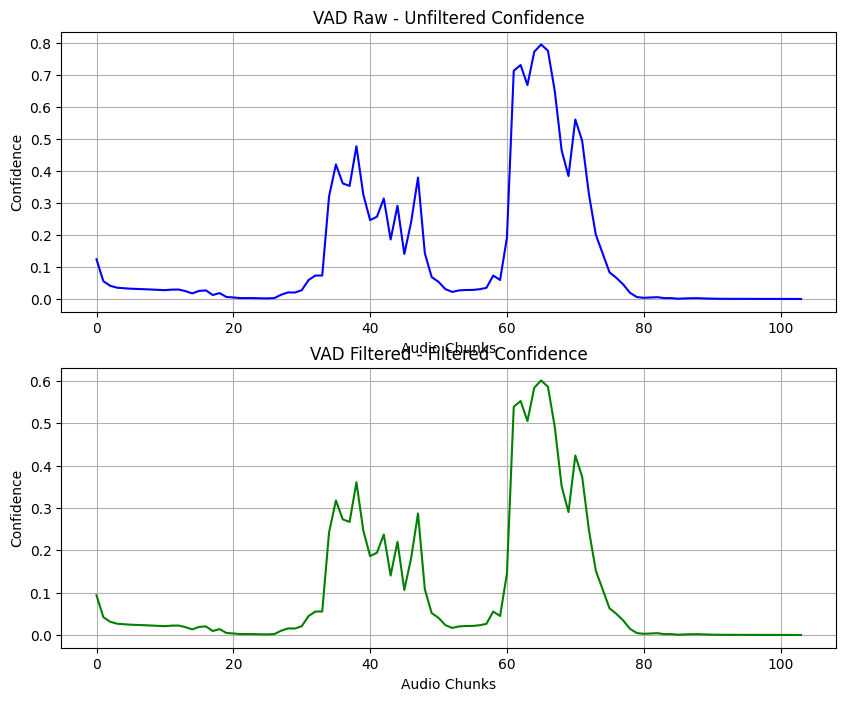

In [1]:
import matplotlib.pyplot as plt
import threading
from preprocessor.pylib import Preprocessor
from audio_pipeline.pylib import Source_Handler

# Initialize audio source and preprocessor
audio_source = Source_Handler()
audio_preprocessor = Preprocessor(audio_source)

continue_recording = True

# Initialize data lists for plotting
unfiltered_data = []
filtered_data = []

def stop():
    input("Press Enter to stop the recording:")
    global continue_recording
    continue_recording = False

def start_recording():
    stop_listener = threading.Thread(target=stop)
    stop_listener.start()

    while continue_recording:
        # Get audio data
        audio_data_filtered = audio_preprocessor.get_filtered_confidence()
        audio_data_unfiltered = audio_preprocessor.unfiltered_confidence
        

        # Append new data for later plotting
        unfiltered_data.append(audio_data_unfiltered)
        filtered_data.append(audio_data_filtered[1])

    # After recording is done, plot the data
    plot_data()

def plot_data():
    # Plotting setup
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    ax1.set_title("VAD Raw - Unfiltered Confidence")
    ax1.set_xlabel("Audio Chunks")
    ax1.set_ylabel("Confidence")
    ax1.plot(unfiltered_data, label="Unfiltered Confidence", color='blue')
    ax1.grid(True)
    plt.subplots_adjust(hspace=0.5)  
    ax2.set_title("VAD Filtered - Filtered Confidence")
    ax2.set_xlabel("Audio Chunks")
    ax2.set_ylabel("Confidence")
    ax2.plot(filtered_data, label="Filtered Confidence", color='green')
    ax2.grid(True)

    plt.show()

start_recording()
